# Part I - Data Exploration Analysis

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
# ================== functions =========================================
# 1. Data types
def data_types_list(data):
    # Get data types of all colums
    data_types = data.dtypes

    # 
    datetime_columns = []
    categorical_columns = []
    numerical_columns = []
    # Separate columns into categorical and numeric
    for col in data.columns:
        if data[col].dtype == 'datetime64[ns]':
            datetime_columns.append(col)
        elif data[col].dtype == 'object':
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
            
    return datetime_columns,categorical_columns, numerical_columns
    
    #date_time_columns = data_types[data.dtypes == 'datetime64[ns]'].index.tolist()
    #categorical_columns = data_types[data_types == 'object'].index.tolist()
    #numerical_columns = data_types[(data_types != 'object') or (data_types != 'datetime64[ns]')].index.tolist()
    

# 2. Are there null values in dataset
def data_null_check(data):
    
    if data.isnull().any().any():
        # calculate the total number of rows in the data
        total_rows = len(data)
        # create an empty list called 'columns_with_null' to store information about columns with nill values
        columns_with_null = []
        # Loop through each column to count the number of null value and calculate the percentage of null values relative to the total number of rows.
        for column in data.columns:
            null_count = data[column].isnull().sum()
            if null_count >0:
                columns_with_null.append(column, null_count, null_count/total_rows*100)
        # convert 'columns_with_null' to a new DataFrame called 'columns_with_null_df' for easier viewing
        columns_with_null_df = pd.DataFrame(columns_with_null, columns = ['Column N','Null Count','Null Percentage'])
    
        # Return result
        return columns_with_null_df
        print(columns_with_null_df)
    
    else:
        print('There are no null values in the dataset')
# . Results
def show_results(data):
    # 1. Data_types => return 2 lists of categorical and numeric features in the dataset
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    print('1. Overview the structure of dataset')
    print(' - Total columns in the dataset: {} , in which:'.format(data.shape[1]))
    print(' - Datetime Columns: {} are list in a variable name - datetime_columns '.format(len(datetime_columns)))
    print(' - Categorical Columns: {} are list in a variable name - categorical_columns '.format(len(categorical_columns)))
    print(' - Numeric Columns    : {} are list in a variable name - numerical_columns '.format(len(numerical_columns)))
    print('----------------------------------------')
    print('2. Check null values')
    columns_with_null_df = data_null_check(data)
    print(columns_with_null_df)


In [3]:
# Load data set
dataset = 'df_day (1).csv'
day_weather = pd.read_csv(dataset)
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      335 non-null    object 
 1   maxtemp_c       335 non-null    float64
 2   maxtemp_f       335 non-null    float64
 3   mintemp_c       335 non-null    float64
 4   mintemp_f       335 non-null    float64
 5   avgtemp_c       335 non-null    float64
 6   avgtemp_f       335 non-null    float64
 7   maxwind_mph     335 non-null    float64
 8   maxwind_kph     335 non-null    float64
 9   totalprecip_mm  335 non-null    float64
 10  totalprecip_in  335 non-null    float64
 11  avgvis_km       335 non-null    float64
 12  avgvis_miles    335 non-null    int64  
 13  avghumidity     335 non-null    int64  
 14  condition       335 non-null    object 
 15  uv              335 non-null    int64  
dtypes: float64(11), int64(3), object(2)
memory usage: 42.0+ KB


In [4]:
# Rename the 'Unnamed: 0' column to 'date'
day_weather.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
day_weather['date'] = pd.to_datetime(day_weather['date'])
day_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            335 non-null    datetime64[ns]
 1   maxtemp_c       335 non-null    float64       
 2   maxtemp_f       335 non-null    float64       
 3   mintemp_c       335 non-null    float64       
 4   mintemp_f       335 non-null    float64       
 5   avgtemp_c       335 non-null    float64       
 6   avgtemp_f       335 non-null    float64       
 7   maxwind_mph     335 non-null    float64       
 8   maxwind_kph     335 non-null    float64       
 9   totalprecip_mm  335 non-null    float64       
 10  totalprecip_in  335 non-null    float64       
 11  avgvis_km       335 non-null    float64       
 12  avgvis_miles    335 non-null    int64         
 13  avghumidity     335 non-null    int64         
 14  condition       335 non-null    object        
 15  uv    

In [5]:
# describe the dataset (len, shape)

shape = day_weather.shape
print('-----------------------------')
print('The structure of the dataset:')
print('-----------------------------')
print('The number of observations: ', shape[0])
print('the number of features: ', shape[1])
print('')
# Execute the step: summary statistics
sum_stats = day_weather.describe()
print('Summary Statistics:\n',sum_stats)

-----------------------------
The structure of the dataset:
-----------------------------
The number of observations:  335
the number of features:  16

Summary Statistics:
         maxtemp_c   maxtemp_f   mintemp_c   mintemp_f   avgtemp_c   avgtemp_f  \
count  335.000000  335.000000  335.000000  335.000000  335.000000  335.000000   
mean    32.901194   91.205373   24.399701   75.917910   27.817015   82.071642   
std      2.868495    5.159443    1.761506    3.168025    1.775510    3.193229   
min     24.200000   75.600000   19.600000   67.300000   23.000000   73.500000   
25%     31.200000   88.150000   23.300000   73.900000   26.600000   79.900000   
50%     32.600000   90.700000   24.300000   75.700000   27.900000   82.100000   
75%     34.500000   94.150000   25.700000   78.300000   29.050000   84.250000   
max     40.100000  104.200000   28.800000   83.800000   32.300000   90.100000   

       maxwind_mph  maxwind_kph  totalprecip_mm  totalprecip_in   avgvis_km  \
count   335.000000

In [6]:
# ================= results ===============================================
show_results(day_weather)

1. Overview the structure of dataset
 - Total columns in the dataset: 16 , in which:
 - Datetime Columns: 1 are list in a variable name - datetime_columns 
 - Categorical Columns: 1 are list in a variable name - categorical_columns 
 - Numeric Columns    : 14 are list in a variable name - numerical_columns 
----------------------------------------
2. Check null values
There are no null values in the dataset
None


### What is the structure of your dataset?

> Description: the dataset has a total of 15 columns, each representing specific weather-related features recorded over time. It appears to be organized in a tabular format with rows representing different dates and times at which the weather data was recorded. This tabular structure is commonly used for storing and analyzing structured data, making it suitable for various data analysis tasks, including time series analysis and weather pattern identification.

### What is/are the main feature(s) of interest in your dataset?

> Based on the provided segments of the dataset, the main features of interest appear to be related to weather and enviromental conditions. These features include:
1. Date and Time information: The date and time columns are essential for understanding when each weather observation was recorded.

2. Date Weather Parameters: Various weather-related parameters such as:
2.1 Temperature data:
* Maximun Temperature (maxtemp_c, maxtemp_f)
* Minimun Temperature (mintemp_c, mintemp_f)
* Average Temperature (avgtemp_c, avgtemp_f)
2.2 Wind data:
* Max wind Speed (maxwind_mph, maxwind_kph)
2.3 Precipitation data:
* Total Precipitation ( totalprecip_mm, totalprecip_in)
2.4 Visibility data:
* Average Visibility (avgvis_km, avgvis_miles)
2.5 Humidity data:
* Average Humidity (avghumidity)
2.6 Condition data:
* Weather Conditions Descriptions (conditiontext)
* Weather Condition Icons (condition.icon)
* Weather Condition Codes (conditionscode)
2.7 UV index
* Ultraviolet (UV) index 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To determine which features in the dataset will support the investigation of temperature-related features, we need to consider the nature of weather data and how temperature is influced by various factors. Here are some key features that are likely to be relevant in understanding temperature variations:
1. Date and Time information: Date and time features can help identify daily, monthly, and seasonal patterns in temperature. These features include columns like 'hourtime', 'astro.sunrise', 'astro.sunset', and 'astromoonrise'.

2. Weather Conditions: Weather conditions can significantly impact temperature. Columns such as 'conditiontext','condition.icon', and 'conditioncode' provide information about the current weather conditions, which can be correlated with temperature.

3. Wind data: Wind speed and directon can affect temperature. Features like 'maxwind_mph', 'maxwind_kph', 'hour.wind_mph', and 'hour.wind_kph' can help analyze the relationship between wind and temperature.

4. Precipitation data: To study precipitation patterns, total Precipitation in millimeters and inches (totalprecip_mm, totalprecip_in) can provide valuable insights.

5. Visibility and Humidity data: Average Visibility (avgvis_km, avgvis_miles) and Average Humidity (avghumidity) can be helpful for understanding visibility and humidity trens.

6. UV Index: UV Index (uv) is important for assessing the level of ultraviolet radiation, which can be valuable for health-related analyses.

In [7]:
day_weather.head()

,date,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,avgvis_km,avgvis_miles,avghumidity,condition,uv
0,2022-10-01,28.9,83.9,24.2,75.6,25.6,78.1,5.8,9.4,8.4,0.33,8.5,5,90,Moderate or heavy rain shower,6
1,2022-10-02,27.3,81.1,23.9,75.0,25.0,77.1,4.9,7.9,6.7,0.26,7.9,4,92,Moderate rain at times,6
2,2022-10-03,31.5,88.7,23.8,74.8,26.9,80.4,7.2,11.5,9.0,0.35,9.9,6,82,Moderate or heavy rain shower,7
3,2022-10-04,31.6,88.9,24.2,75.6,26.9,80.4,6.7,10.8,4.6,0.18,9.8,6,83,Heavy rain at times,7
4,2022-10-05,31.3,88.3,24.0,75.2,27.1,80.7,8.1,13.0,12.9,0.51,10.0,6,81,Moderate or heavy rain shower,7


## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 

> **Rubric Tip**: This part (Univariate Exploration) should include at least one histogram, and either a bar chart of count plot.

>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Univariate Exploration for numerical columns

In [10]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_num_cols(data):
    datetime_columns, categorical_columns, numerical_columns = data_types_list(data)
    #numeric_columns = ['maxtemp_c']
    for col in numerical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(15,4))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,3,1)
                              
        # Create a statistical summary 
        stats_summary = data[col].describe().reset_index()
        stats_summary.columns = ['Stat','Value']
        stats_summary['Value']= stats_summary['Value'].round(1)
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl, va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Histogram
        plt.subplot(1,3,2)

        # Create a histogram
        sns.histplot(data=data, x=col, bins=24, kde=True, color ='#97acc9', line_kws={'color':'#D87D7A'})
        #sns.kdeplot(data=trip_data, x='start_hour',color = '#D87D7A')
        ax = sns.histplot(data=data, x=col, bins=24, kde=False, color ='#97acc9', line_kws={'color':'#D87D7A','lw':5})
        ax.lines[0].set_color('#D87D7A')
        ax.lines[0].set_linewidth(1.5)
        #ax.lines[0].set_marker(5)
        plt.xlabel('Hour of Day')
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xlabel('Histogram')
        plt.ylabel('Frequency')
        
        # Subplot 3: Box plot
        plt.subplot(1,3,3)
        plt.boxplot(data[col], patch_artist = True,notch ='True', vert = 1,showfliers=False
                    ,boxprops=dict(facecolor='#97acc9', color='#97acc9')
                    ,showmeans=True, meanprops=dict(color='#D87D7A',markersize=5)
                    ,medianprops=dict(color='#D87D7A',linewidth=2))
        mu = data[col].mean()
        sigma = data[col].std()
        median = data[col].quantile(q=.5)
        plt.text(1.15, median-0.5,'Median {:,.1f} '.format(median), style='italic', fontweight = 'bold',fontsize =8)
        #plt.text(1.15, mu-0.5,'Mean {:,.1f} '.format(mu), style='italic', fontweight = 'bold',fontsize =8)
        plt.ylabel(col)
        plt.xlabel('Box Plot, without outliers')

        plt.tight_layout()
        plt.show()
        

In [14]:
# create a function for Univariate Exploration 
# used for number - numeric_columns
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)

#numeric_columns = [maxtemp_c]

def Uni_analysis_cate_cols(data):
    datetime_columns, categorical_columns, numeric_columns = data_types_list(day_weather)
    for col in categorical_columns:
        # set up the figure with 3 subplots 
        plt.figure(figsize=(20,5))
        plt.suptitle ('Distribution of {}'.format(col),fontweight = 'bold', color = 'black', fontsize=22)
        plt.gcf().autofmt_xdate()
    
        # Subplot 1: Statistical summary
        plt.subplot(1,2,1)
                              
        #stats_summary = data[col].describe().reset_index()
        #stats_summary.columns = ['Stat','Value']
        #stats_summary['Value']= stats_summary['Value'].round(1)
        
        # Count unique values and their percentages:
        unique_counts = data[col].value_counts()
        percentage_counts = data[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
        stats_summary = pd.DataFrame({'Unique Values': unique_counts, 'Percentage (%)': percentage_counts})
        stats_summary = stats_summary.reset_index().rename(columns= {'index':col})
                      
        stats_tbl = tabulate(stats_summary, headers = ['Stat','Value'], tablefmt='simple', showindex=False)
        plt.text(0.3,0.5, stats_tbl,va='center', fontfamily='monospace',fontsize=14)
        plt.axis('off')
        plt.xlabel('Statictis Summary')
        
        # Subplot 2:
        # Subplot 2: Bar chart
        #plt.subplot(2,2,2)
        plt.subplot(1,2,2)
        
        Palette = ['#97acc9','#D1DAE7','#EDC5C4','#D87D7A','grey']
        value_counts = data[col].value_counts().head(10)
        labels = value_counts.index

        #sns.barplot(x=value_counts.index, y = value_counts.values, palette = Palette)
        #plt.ylabel('Frequency')
        
        #sns.barplot(x=value_counts.values, y=value_counts.index, palette='viridis')
        sns.barplot(x=value_counts.values, y=value_counts.index, palette=Palette)
        plt.xlabel('Frequency')
        plt.ylabel(col)
        plt.title('Top 10 {}'.format(col))
        # Subplot 3: Box plot
        #plt.subplot(2,2,4)

        plt.tight_layout()
        plt.show()

List of numerical columns:  ['maxtemp_c', 'maxtemp_f', 'mintemp_c', 'mintemp_f', 'avgtemp_c', 'avgtemp_f', 'maxwind_mph', 'maxwind_kph', 'totalprecip_mm', 'totalprecip_in', 'avgvis_km', 'avgvis_miles', 'avghumidity', 'uv']


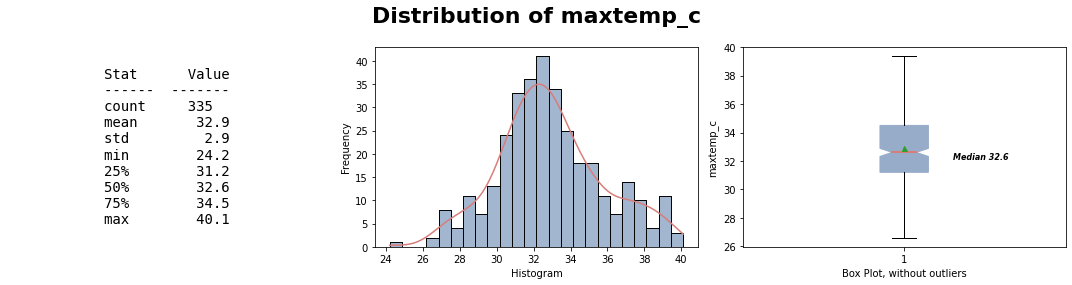

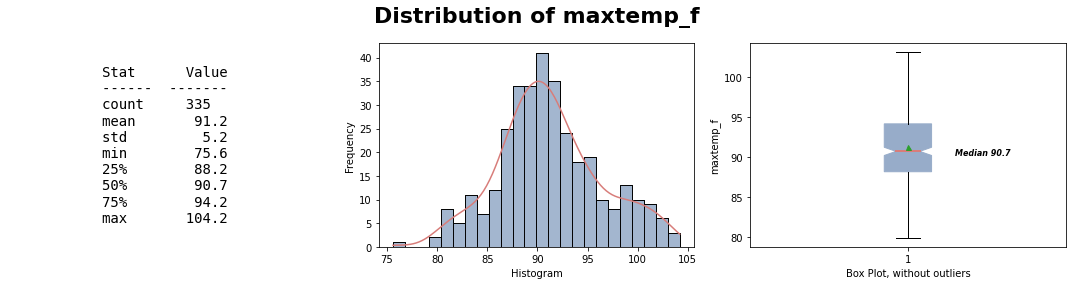

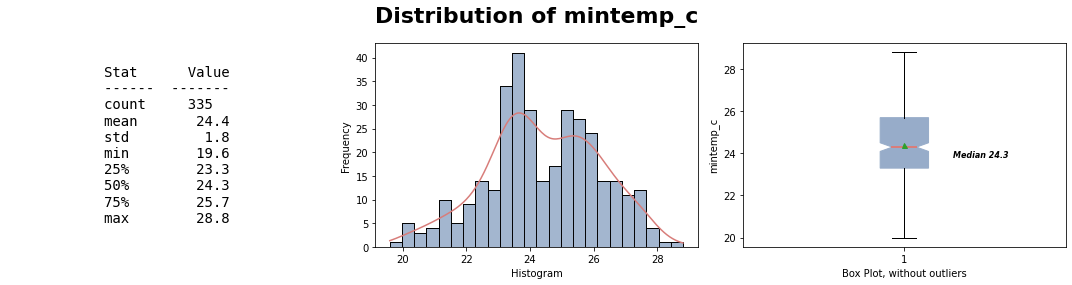

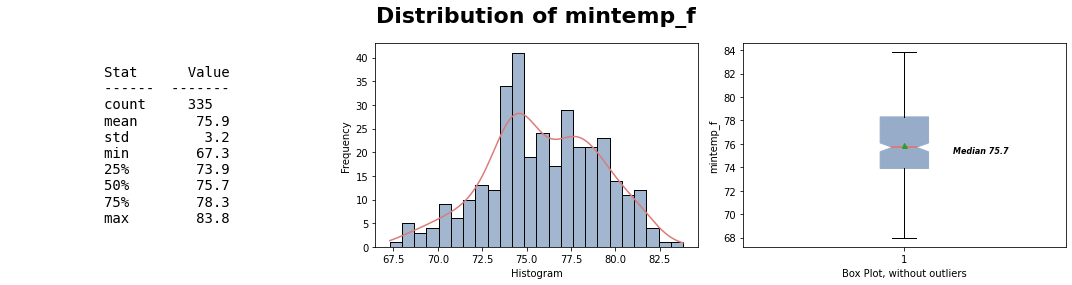

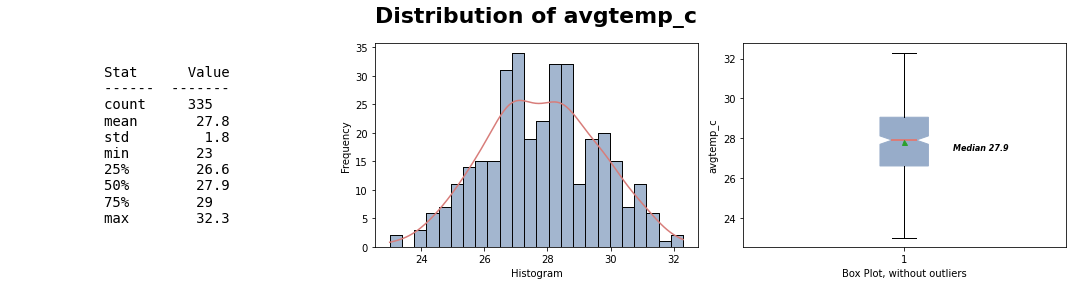

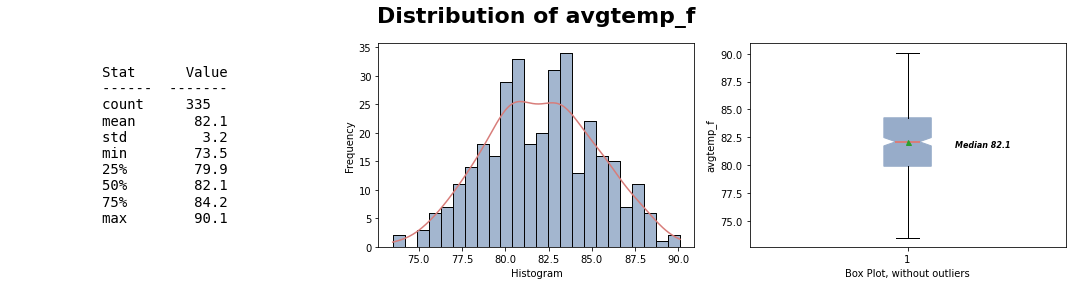

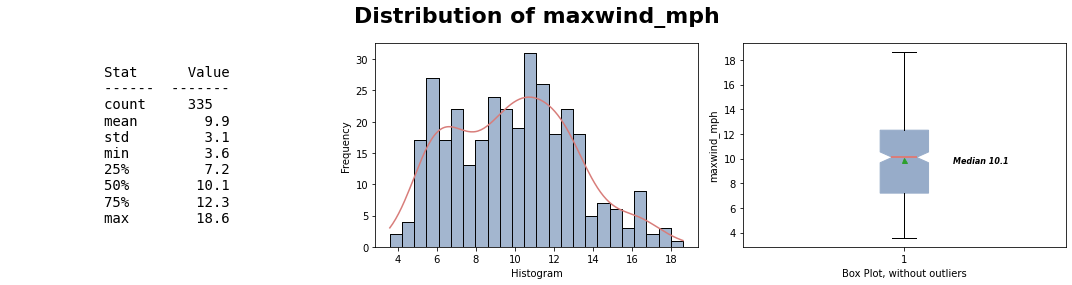

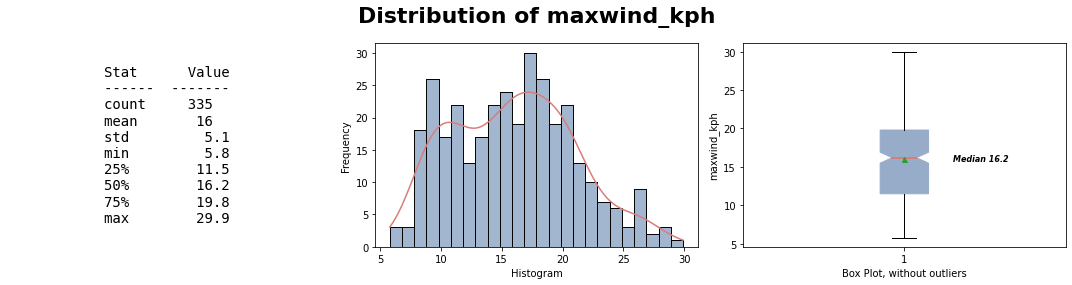

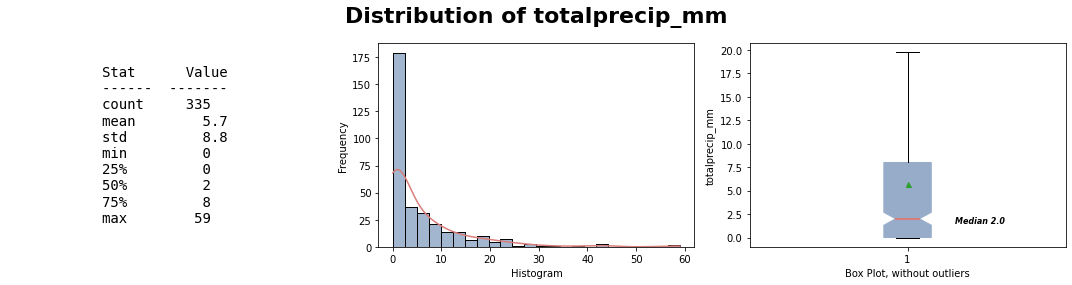

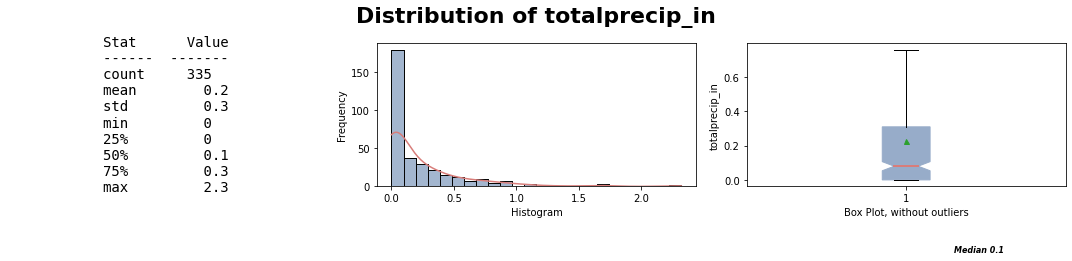

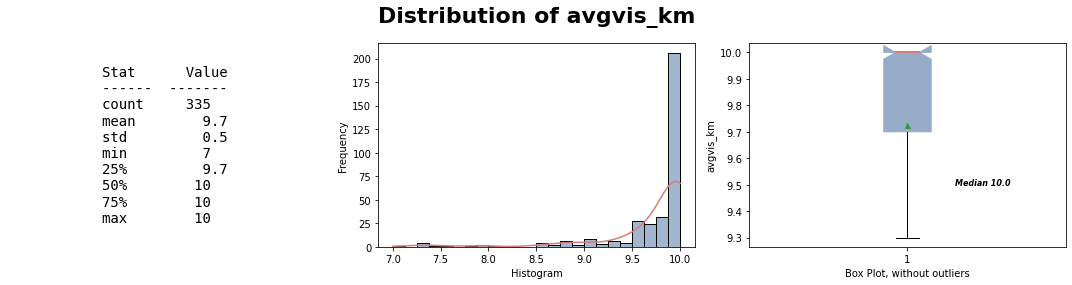

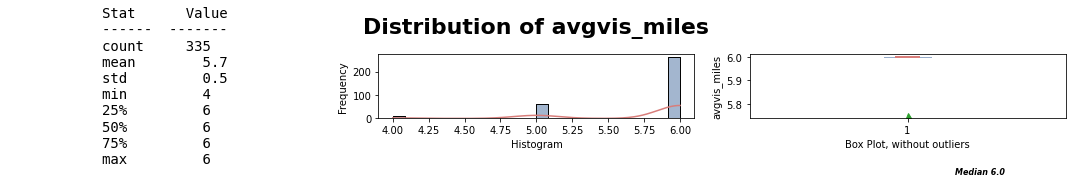

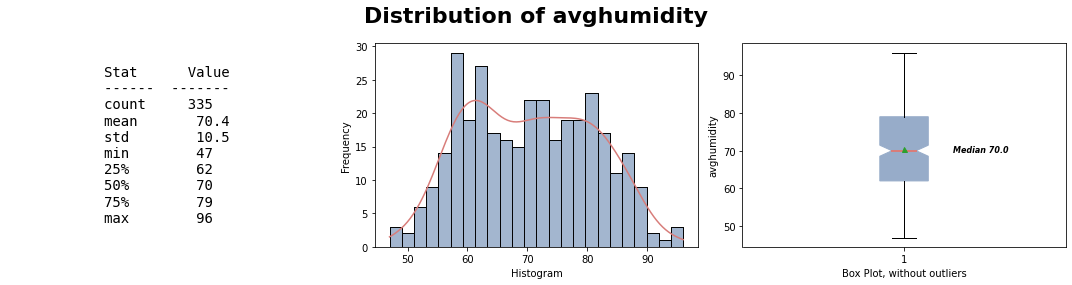

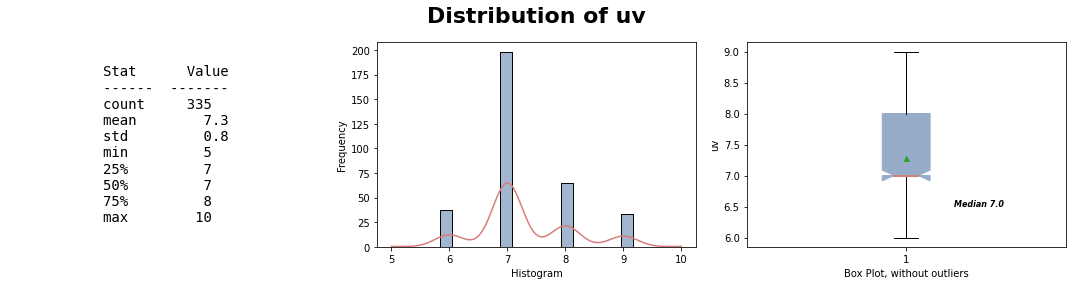

List of categorical columns:  ['condition']


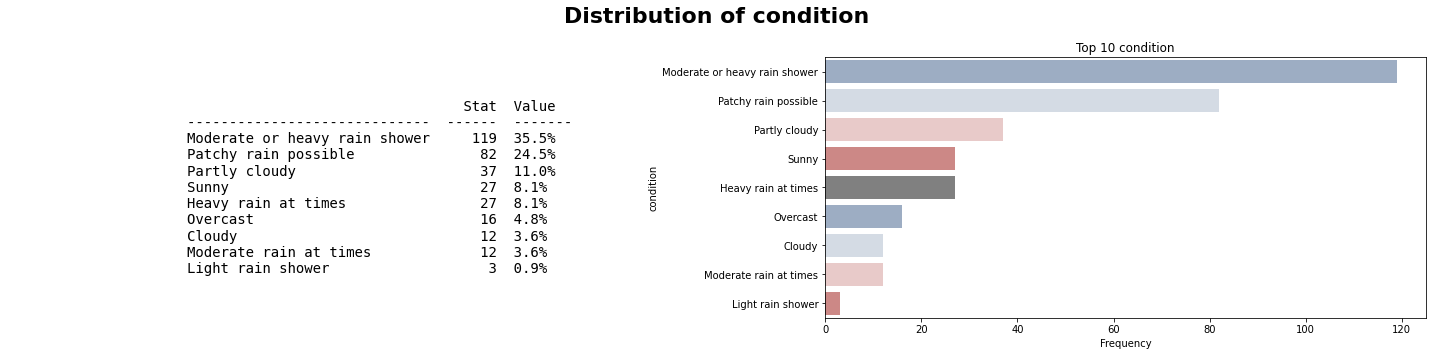

In [15]:
datetime_columns, categorical_columns, numerical_columns = data_types_list(day_weather)
print('List of numerical columns: ', numerical_columns)

# Show the results
Uni_analysis_num_cols(day_weather)

# Show the results
print('List of categorical columns: ',categorical_columns)
Uni_analysis_cate_cols(day_weather)

## 1. Create a model to estimate temperature - Maximum temperature in Celsius
------
Creating a model to estimate the maximum, minimum, and average temperatures for the next 30 days typically involves time series forecasting. Time series forecasting is a common approach for predicting future values based on historical data. In this case, historical weather data can be used to train a forecasting model. Here's a high-level overview of the steps to create such a model:


### Step 1. Import dataset
-------

In [18]:
# Select the 'date' and 'maxtemp_c' columns
data = day_weather[['date', 'maxtemp_c']]

# Set 'date' as the index
data.set_index('date', inplace=True)

### Step 2. Exploratory Analysis
-------

In [19]:
# Create a function to inspect the first 5 rows and the last 5 rows from the data
from IPython.display import display

# show the earliest 5 days and the last 5 days
def inspect_data(data):
    display(data.head(5))
    display(data.tail(5))

# showw the max and min values
def output_max_min_values(data):
    print(data[(data == data.values.max()).any(axis=1)])
    print(data[(data == data.values.min()).any(axis=1)])

# Visualize the daily change of temperature varibles
def plot_daily_change(data):
    plt.figure(figsize = (15,5))
    plt.plot(data.index, data.iloc[:,0], color ='r')
    title = 'Plot the daily change of ' + str(data.columns[0])
    #plt.gca().set(title='Plot the daily change', xlabel ='Date', ylabel = data.columns[0] )
    plt.gca().set(title=title, xlabel ='Date', ylabel = data.columns[0] )
    plt.show()

# Visualize the Moving average n days
def plot_Moving_Avg_n_days(data, n):
    data_mean = pd.DataFrame(data.iloc[:,0].rolling(window=30).mean())
    plt.figure(figsize = (15,5))
    plt.plot(data_mean.index,data_mean.iloc[:,0],color='b')
    
# Additvie Decomposition    
def additive_decomposition(data):
    result_add = seasonal_decompose(data.iloc[:,0],model='additive', extrapolate_trend='freq', period=7)
    
    # Plot
    plt.rcParams.update({'figure.figsize':(10,10)})
    result_add.plot().suptitle('Additive Decomposition', fontsize=22)

,maxtemp_c
date,
2022-10-01,28.9
2022-10-02,27.3
2022-10-03,31.5
2022-10-04,31.6
2022-10-05,31.3


,maxtemp_c
date,
2023-08-27,33.2
2023-08-28,34.6
2023-08-29,33.8
2023-08-30,32.7
2023-08-31,31.0


            maxtemp_c
date                 
2023-03-17       40.1
            maxtemp_c
date                 
2022-11-20       24.2


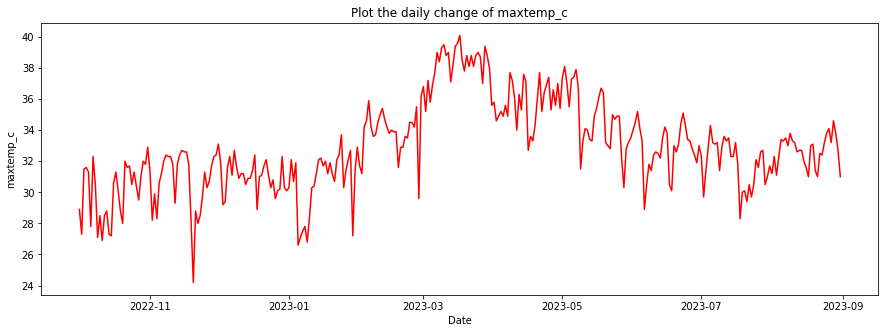

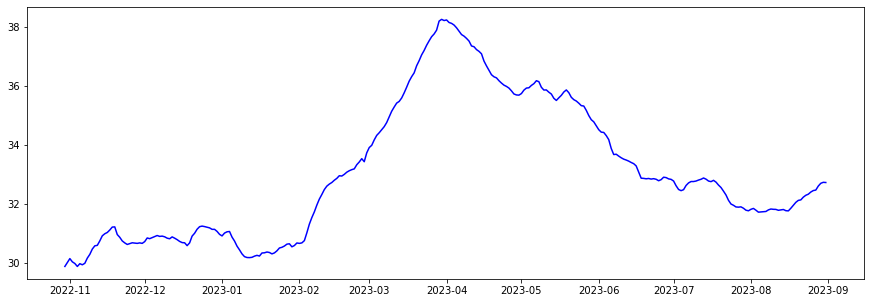

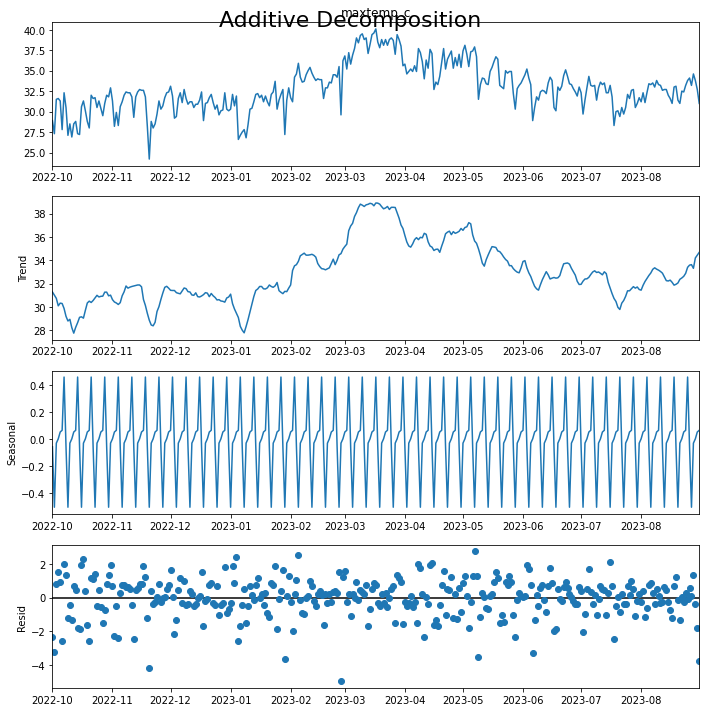

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
inspect_data(data)
output_max_min_values(data)
plot_daily_change(data)
plot_Moving_Avg_n_days(data, 30)
additive_decomposition(data)

### Step 3. Create a Baseline Model
-------
We use 1-step prediction to model the temperature as a time series
and validate the model by the Root Mean Squared Error (RMSE)


In [21]:
def create_baseline_model(data):
    """
    Predict the weather based on an assumption: The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.
    So, we use 1-step prediction to model the temperature as a time series
    """
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # Select from the second row, because there is no prediction for today due to shifting
    one_step_df = one_step_df[1:]
    print('==== Baseline Model ====')
    print('-----------------------------------------------------------')
    print('Step 1: Create a Baseline Model and show the first 5 values')
    print(one_step_df.head(5))
    
    # ==== Step 2: Validate the model by RMSE (Root Mean Squared Error)
    # Calculate the RMSE
    temp_pred_err = MSE(one_step_df.iloc[:,1],one_step_df.iloc[:,0], squared=False)
    print('   ')
    print('-----------------------------------------------------------')
    print('Step 2: Validate the model by RMSE')
    print('The RSME is',round(temp_pred_err,2))
    print('Comment:')
    print( '- The RMSE is small, meaning that 1-step prediction baseline model has the average error')
    print('  of only {} units'.format(round(temp_pred_err,2)))

In [22]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

create_baseline_model(data)

==== Baseline Model ====
-----------------------------------------------------------
Step 1: Create a Baseline Model and show the first 5 values
            maxtemp_c_pred  maxtemp_c_actual
date                                        
2022-10-02            28.9              27.3
2022-10-03            27.3              31.5
2022-10-04            31.5              31.6
2022-10-05            31.6              31.3
2022-10-06            31.3              27.8
   
-----------------------------------------------------------
Step 2: Validate the model by RMSE
The RSME is 1.56
Comment:
- The RMSE is small, meaning that 1-step prediction baseline model has the average error
  of only 1.56 units


### Step 3. Weather Forecast using SARIMA model -- Maximum temperature variable
-------
We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend and noise in data:

We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMA() function from the statsmodels module and assess its overall quality.

In [31]:
def create_a_SARIMA_model(data):
    
    # use Grid Search to find the optimal combination of parameters for SARIMA model
    print('==== SARIMA Model ====')
    print('-----------------------------------------------------------')
    print('Step 1: Parameter Selection by using Grid Search')
    
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # define the p, d, and q parameters to take any value between 0 and 2
    p = d = q = range(0,2)
    
    # Generate all different combinations of ap, d, and q triplets
    pdq = list(itertools.product(p,d,q))
    
    # Generate all differnet combination of seasonal p, d, and q triples
    seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
    
    # initial AIC
    min_param= pdq[0]
    min_param_seasonal = seasonal_pdq[0]
    min_mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                        order = min_param,
                                        seasonal_order = min_param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    min_result = min_mod.fit()
    min_param_aic = min_result.aic
    print('The base parameters for SARIMA is SARIMA{}X{}12 - AIC: {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))
          
    # find the optimal combination of parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try: 
                print
                mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                                order = param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                
                #print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
                if min_param_aic > results.aic:
                    min_param_aic = results.aic
                    min_param = param
                    min_param_seasonal = param_seasonal
            except:
                continue
    print('The min AIC value is {}'.format(min_param_aic))
    print(' ')
    print('=> The AIC measures how well a model fits the data. The output suggests that SARIMA{}X{}12 yields the lowest AIC value of {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))

    # Step 2: Fitting the model
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 2: Fitting the Model')
    
    mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                    order = min_param,
                                    order_seasonal = min_param_seasonal,
                                    enforce_stationarity = False,
                                    enforce_invertibility=False)

    results = mod.fit()
    print('SARIMA model is created')
    
    # Step 3: Model Diagnostics
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 3: Model Diagnostics')
    print('The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior')
    print('Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.')
    print(' ')
    
    results.plot_diagnostics(figsize=(20,10))
    plt.show()
    
    # Step 4: Validating the Non_Dynamic Forecast
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 4: Validating the Forecast')
    print('Overal, the forecasts align with the true values quite well')
    pred = results.get_prediction(start=pd.to_datetime('2023-01-01'),dynamic=False)
    pred_ci = pred.conf_int()
    
    # plot the real adn forecasted values
    ax = one_step_df.iloc[:,1].plot(label='observed', figsize=(20,7))
    pred.predicted_mean.plot(ax=ax, label ='forecast') 
    
    ax.fill_between (pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
    ax.set_xlabel('Date')
    ax.set_ylabel(data.columns[0])
    plt.legend()
    plt.show()
    
    
    # Step 5: Forecast Diagnostic
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 5: Compute the Mean Squared Error of the forecasts')
    y_forecasted = pred.predicted_mean
    y_truth = one_step_df.iloc[:,1]['2023-01-01':]
    
    # Compute the MSE
    mse = MSE(y_truth, y_forecasted,squared=True)
    print(' The MSE of the forecasts is {}'.format(round(mse,2)))
    
    # Step 6: Forecast next 30 days 
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 6: Forecast next 30 days')
    # Define the periods
    forecast_periods = 30
    
    # Get the forecast for the future periods
    forecast = results.get_forecast(steps = forecast_periods)
    
    # Set forecast index
    forecast_start_date = one_step_df.index[-1] + pd.Timedelta(days=1) # Assuming daily frequency
    forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_periods -1)
    forecast_index = pd.date_range(forecast_start_date, forecast_end_date)
    
    # extract forecasted values and confidence intervals
    forecasted_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    # Set the forecasted values and confident intervals index to the forecast_index
    forecasted_values.index = forecast_index
    confidence_intervals.index = forecast_index
    
    # Export the DataFrame to a CSV file
    start_dt = forecast_index[0].strftime("%d_%m_%y")
    end_dt = forecast_index[-1].strftime("%d_%m_%y")
    file_name = data.columns[0] + '_forecasted_values' +'_from_' + start_dt + '_to_' + end_dt + '.csv'
    forecasted_values.to_csv(file_name, index=False)
    print('file csv of forecasted values is created')

    # Visualize the results
    ax = one_step_df.iloc[:,1].plot(label = 'observed', figsize=(18,7))
    pred.predicted_mean.plot(label =' forecast')
    forecasted_values.plot(label='Next forecast', color = 'red')
    
    # Plot the forecasted values
    ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color= 'k', alpha=.2)
    
    # Plot the forecast values of next 30 days
    ax.fill_between(confidence_intervals.index
               , confidence_intervals.iloc[:, 0]
                , confidence_intervals.iloc[:, 1], color='b', alpha=.2
                , label='Confidence Interval')
    ax.set_xlabel("Date")
    ax.set_ylabel(data.columns[0])
    plt.legend()
    plt.show()

==== SARIMA Model ====
-----------------------------------------------------------
Step 1: Parameter Selection by using Grid Search
The base parameters for SARIMA is SARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC: 3286.27
The min AIC value is 1123.8485224140436
 
=> The AIC measures how well a model fits the data. The output suggests that SARIMA(1, 1, 1)X(0, 1, 1, 12)12 yields the lowest AIC value of 1123.85
 
-----------------------------------------------------------
Step 2: Fitting the Model
SARIMA model is created
 
-----------------------------------------------------------
Step 3: Model Diagnostics
The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior
Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.
 


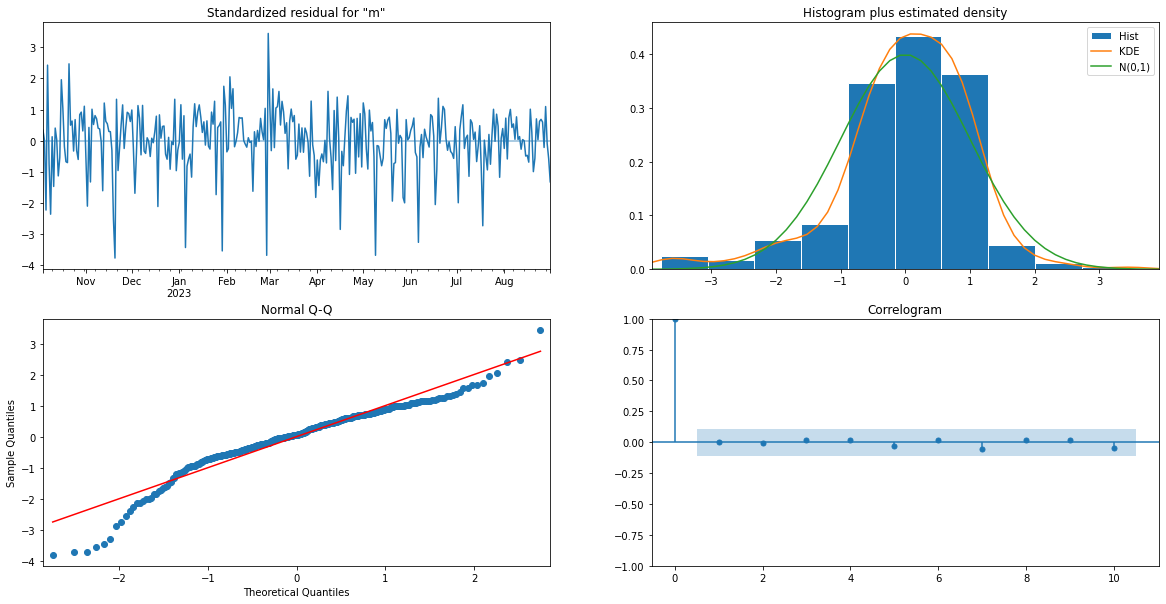

 
-----------------------------------------------------------
Step 4: Validating the Forecast
Overal, the forecasts align with the true values quite well


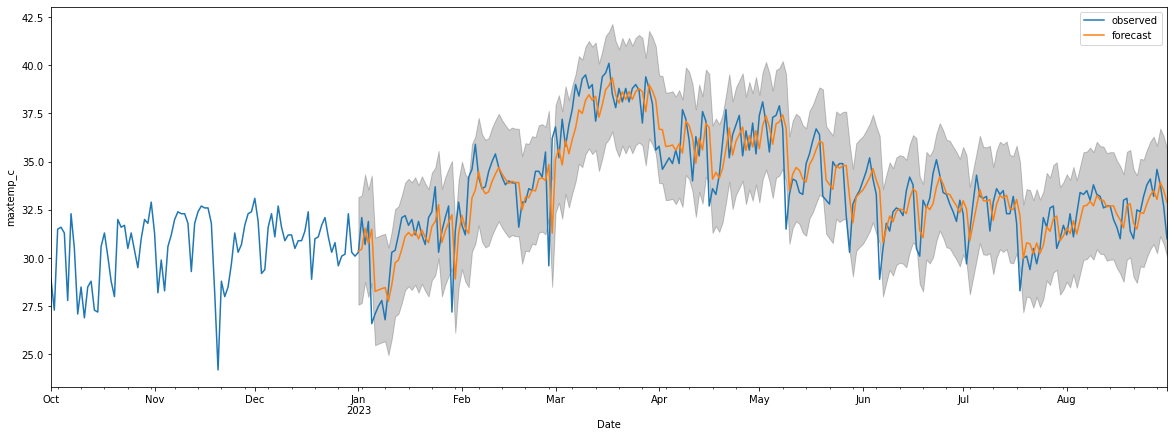

 
-----------------------------------------------------------
Step 5: Compute the Mean Squared Error of the forecasts
 The MSE of the forecasts is 1.95
 
-----------------------------------------------------------
Step 6: Forecast next 30 days
file csv of forecasted values is created


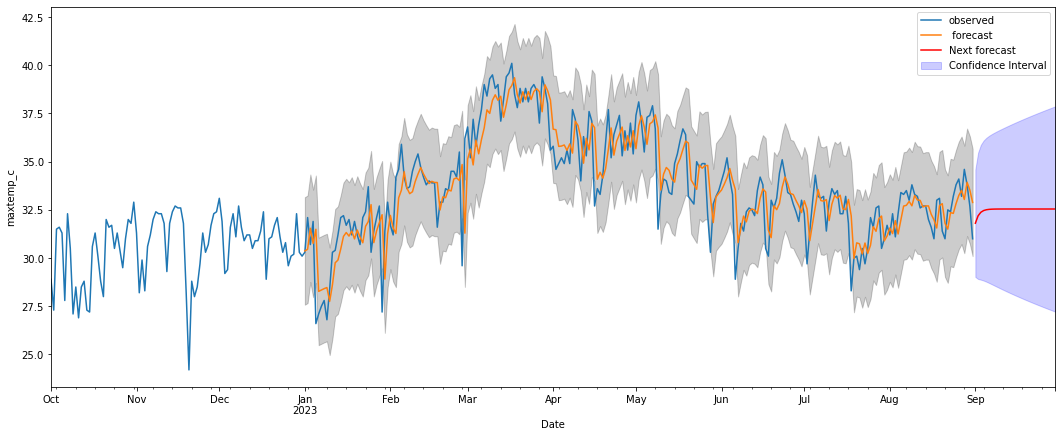

In [32]:
import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
from datetime import datetime

create_a_SARIMA_model(data)

## 2. Create a model to estimate temperature - Minimum temperature in Celsius
------
Creating a model to estimate the maximum, minimum, and average temperatures for the next 30 days typically involves time series forecasting. Time series forecasting is a common approach for predicting future values based on historical data. In this case, historical weather data can be used to train a forecasting model. Here's a high-level overview of the steps to create such a model:


### Step 1. Import dataset
-------

In [33]:
# Select the 'date' and 'maxtemp_c' columns
data = day_weather[['date', 'mintemp_c']]

# Set 'date' as the index
data.set_index('date', inplace=True)

### Step 2. Exploratory Analysis
-------

In [38]:
# Create a function to inspect the first 5 rows and the last 5 rows from the data
from IPython.display import display

# show the earliest 5 days and the last 5 days
def inspect_data(data):
    display(data.head(5))
    display(data.tail(5))

# showw the max and min values
def output_max_min_values(data):
    print(data[(data == data.values.max()).any(axis=1)])
    print(data[(data == data.values.min()).any(axis=1)])
    print(' ')

# Visualize the daily change of temperature varibles
def plot_daily_change(data):
    plt.figure(figsize = (15,5))
    plt.plot(data.index, data.iloc[:,0], color ='r')
    title = 'Plot the daily change of ' + str(data.columns[0])
    #plt.gca().set(title='Plot the daily change', xlabel ='Date', ylabel = data.columns[0] )
    plt.gca().set(title=title, xlabel ='Date', ylabel = data.columns[0] )
    plt.show()
    print(' ')

# Visualize the Moving average n days
def plot_Moving_Avg_n_days(data, n):
    data_mean = pd.DataFrame(data.iloc[:,0].rolling(window=30).mean())
    plt.figure(figsize = (15,5))
    plt.plot(data_mean.index,data_mean.iloc[:,0],color='b')
    title = 'Plot the Moving average 30 days ' + str(data.columns[0])
    #plt.gca().set(title='Plot the daily change', xlabel ='Date', ylabel = data.columns[0] )
    plt.gca().set(title=title, xlabel ='Date', ylabel = data.columns[0] )
    print(' ')
    
# Additvie Decomposition    
def additive_decomposition(data):
    result_add = seasonal_decompose(data.iloc[:,0],model='additive', extrapolate_trend='freq', period=7)
    
    # Plot
    plt.rcParams.update({'figure.figsize':(10,10)})
    result_add.plot().suptitle('Additive Decomposition', fontsize=22)

,mintemp_c
date,
2022-10-01,24.2
2022-10-02,23.9
2022-10-03,23.8
2022-10-04,24.2
2022-10-05,24.0


,mintemp_c
date,
2023-08-27,26.1
2023-08-28,25.7
2023-08-29,25.6
2023-08-30,25.0
2023-08-31,25.1


            mintemp_c
date                 
2023-05-07       28.8
            mintemp_c
date                 
2022-12-24       19.6
 


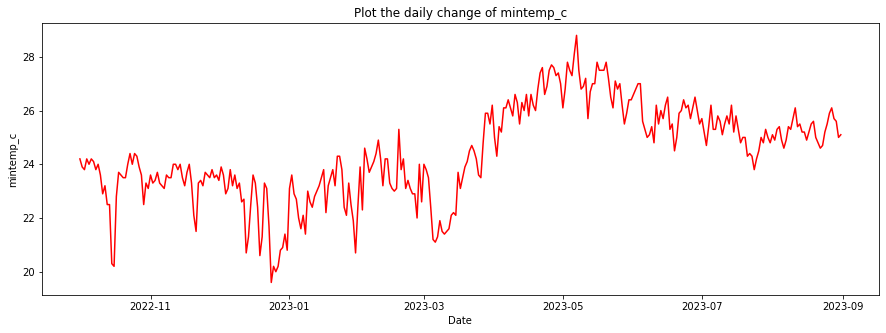

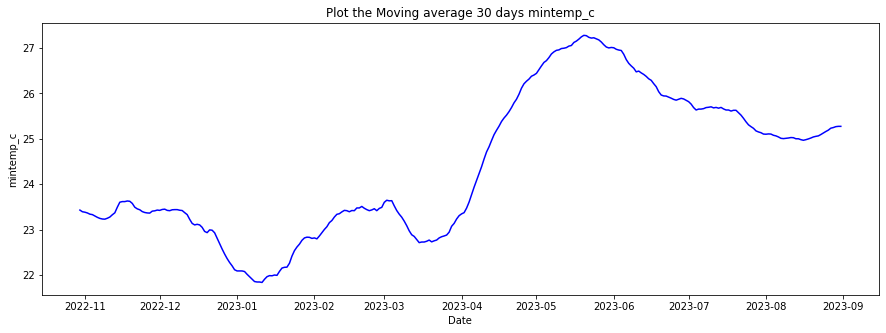

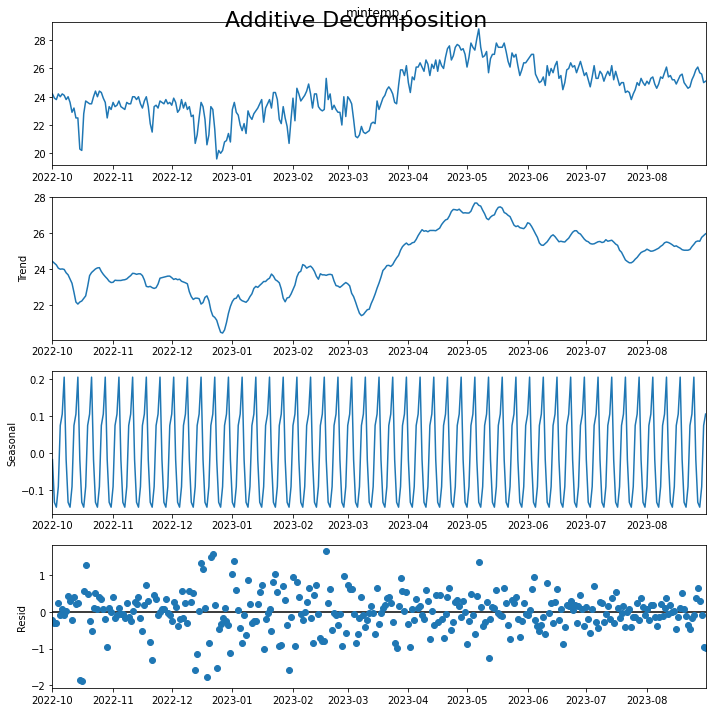

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
inspect_data(data)
output_max_min_values(data)
plot_daily_change(data)
plot_Moving_Avg_n_days(data, 30)
additive_decomposition(data)

### Step 3. Create a Baseline Model
-------
We use 1-step prediction to model the temperature as a time series
and validate the model by the Root Mean Squared Error (RMSE)


In [40]:
def create_baseline_model(data):
    """
    Predict the weather based on an assumption: The air temperature today depends on the air temperature yesterday, the air temperature yesterday depends on the day before yesterday, and so on.
    So, we use 1-step prediction to model the temperature as a time series
    """
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # Select from the second row, because there is no prediction for today due to shifting
    one_step_df = one_step_df[1:]
    print('==== Baseline Model ====')
    print('-----------------------------------------------------------')
    print('Step 1: Create a Baseline Model and show the first 5 values')
    print(one_step_df.head(5))
    
    # ==== Step 2: Validate the model by RMSE (Root Mean Squared Error)
    # Calculate the RMSE
    temp_pred_err = MSE(one_step_df.iloc[:,1],one_step_df.iloc[:,0], squared=False)
    print('   ')
    print('-----------------------------------------------------------')
    print('Step 2: Validate the model by RMSE')
    print('The RSME is',round(temp_pred_err,2))
    print('Comment:')
    print( '- The RMSE is small, meaning that 1-step prediction baseline model has the average error')
    print('  of only {} units'.format(round(temp_pred_err,2)))

In [41]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

create_baseline_model(data)

==== Baseline Model ====
-----------------------------------------------------------
Step 1: Create a Baseline Model and show the first 5 values
            mintemp_c_pred  mintemp_c_actual
date                                        
2022-10-02            24.2              23.9
2022-10-03            23.9              23.8
2022-10-04            23.8              24.2
2022-10-05            24.2              24.0
2022-10-06            24.0              24.2
   
-----------------------------------------------------------
Step 2: Validate the model by RMSE
The RSME is 0.7
Comment:
- The RMSE is small, meaning that 1-step prediction baseline model has the average error
  of only 0.7 units


### Step 3. Weather Forecast using SARIMA model -- Maximum temperature variable
-------
We are going to apply one of the most commonly used method for time-series forecasting, known as SARIMA, which stands for Seasonal Autoregressive Integrated Moving Average. SARIMA models are denoted with the notation SARIMA(p,d,q)(P,D,Q,s). These three parameters account for seasonality, trend and noise in data:

We will use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal SARIMA model with the SARIMA() function from the statsmodels module and assess its overall quality.

In [42]:
def create_a_SARIMA_model(data):
    
    # use Grid Search to find the optimal combination of parameters for SARIMA model
    print('==== SARIMA Model ====')
    print('-----------------------------------------------------------')
    print('Step 1: Parameter Selection by using Grid Search')
    
    # ==== Step 1: Create a Baseline Model ====
    # Shift the current value to the next day
    data_pred = data.columns[0] + '_pred'
    data_acrual = data.columns[0] + '_actual'
    predicted_df = data.iloc[:,0].to_frame().shift(1).rename(columns = {data.columns[0]:data_pred})
    actual_df = data.iloc[:,0].to_frame().rename(columns= {data.columns[0]:data_acrual})
    
    # Concate the actual and predicted variable
    one_step_df = pd.concat([predicted_df,actual_df],axis=1)
    
    # define the p, d, and q parameters to take any value between 0 and 2
    p = d = q = range(0,2)
    
    # Generate all different combinations of ap, d, and q triplets
    pdq = list(itertools.product(p,d,q))
    
    # Generate all differnet combination of seasonal p, d, and q triples
    seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
    
    # initial AIC
    min_param= pdq[0]
    min_param_seasonal = seasonal_pdq[0]
    min_mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                        order = min_param,
                                        seasonal_order = min_param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
    min_result = min_mod.fit()
    min_param_aic = min_result.aic
    print('The base parameters for SARIMA is SARIMA{}X{}12 - AIC: {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))
          
    # find the optimal combination of parameters
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try: 
                print
                mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                                order = param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                
                #print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
                
                if min_param_aic > results.aic:
                    min_param_aic = results.aic
                    min_param = param
                    min_param_seasonal = param_seasonal
            except:
                continue
    print('The min AIC value is {}'.format(min_param_aic))
    print(' ')
    print('=> The AIC measures how well a model fits the data. The output suggests that SARIMA{}X{}12 yields the lowest AIC value of {}'.format(min_param, min_param_seasonal, round(min_param_aic,2)))

    # Step 2: Fitting the model
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 2: Fitting the Model')
    
    mod = sm.tsa.statespace.SARIMAX(one_step_df.iloc[:,1],
                                    order = min_param,
                                    order_seasonal = min_param_seasonal,
                                    enforce_stationarity = False,
                                    enforce_invertibility=False)

    results = mod.fit()
    print('SARIMA model is created')
    
    # Step 3: Model Diagnostics
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 3: Model Diagnostics')
    print('The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior')
    print('Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.')
    print(' ')
    
    results.plot_diagnostics(figsize=(20,10))
    plt.show()
    
    # Step 4: Validating the Non_Dynamic Forecast
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 4: Validating the Forecast')
    print('Overal, the forecasts align with the true values quite well')
    pred = results.get_prediction(start=pd.to_datetime('2023-01-01'),dynamic=False)
    pred_ci = pred.conf_int()
    
    # plot the real adn forecasted values
    ax = one_step_df.iloc[:,1].plot(label='observed', figsize=(20,7))
    pred.predicted_mean.plot(ax=ax, label ='forecast') 
    
    ax.fill_between (pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
    ax.set_xlabel('Date')
    ax.set_ylabel(data.columns[0])
    plt.legend()
    plt.show()
    
    
    # Step 5: Forecast Diagnostic
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 5: Compute the Mean Squared Error of the forecasts')
    y_forecasted = pred.predicted_mean
    y_truth = one_step_df.iloc[:,1]['2023-01-01':]
    
    # Compute the MSE
    mse = MSE(y_truth, y_forecasted,squared=True)
    print(' The MSE of the forecasts is {}'.format(round(mse,2)))
    
    # Step 6: Forecast next 30 days 
    print(' ')
    print('-----------------------------------------------------------')
    print('Step 6: Forecast next 30 days')
    # Define the periods
    forecast_periods = 30
    
    # Get the forecast for the future periods
    forecast = results.get_forecast(steps = forecast_periods)
    
    # Set forecast index
    forecast_start_date = one_step_df.index[-1] + pd.Timedelta(days=1) # Assuming daily frequency
    forecast_end_date = forecast_start_date + pd.DateOffset(days=forecast_periods -1)
    forecast_index = pd.date_range(forecast_start_date, forecast_end_date)
    
    # extract forecasted values and confidence intervals
    forecasted_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    # Set the forecasted values and confident intervals index to the forecast_index
    forecasted_values.index = forecast_index
    confidence_intervals.index = forecast_index
    
    # Export the DataFrame to a CSV file
    start_dt = forecast_index[0].strftime("%d_%m_%y")
    end_dt = forecast_index[-1].strftime("%d_%m_%y")
    file_name = data.columns[0] + '_forecasted_values' +'_from_' + start_dt + '_to_' + end_dt + '.csv'
    forecasted_values.to_csv(file_name, index=False)
    print('file csv of forecasted values is created')

    # Visualize the results
    ax = one_step_df.iloc[:,1].plot(label = 'observed', figsize=(18,7))
    pred.predicted_mean.plot(label =' forecast')
    forecasted_values.plot(label='Next forecast', color = 'red')
    
    # Plot the forecasted values
    ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color= 'k', alpha=.2)
    
    # Plot the forecast values of next 30 days
    ax.fill_between(confidence_intervals.index
               , confidence_intervals.iloc[:, 0]
                , confidence_intervals.iloc[:, 1], color='b', alpha=.2
                , label='Confidence Interval')
    ax.set_xlabel("Date")
    ax.set_ylabel(data.columns[0])
    plt.legend()
    plt.show()

==== SARIMA Model ====
-----------------------------------------------------------
Step 1: Parameter Selection by using Grid Search
The base parameters for SARIMA is SARIMA(0, 0, 0)X(0, 0, 0, 12)12 - AIC: 3085.58
The min AIC value is 655.323778567956
 
=> The AIC measures how well a model fits the data. The output suggests that SARIMA(1, 1, 1)X(0, 1, 1, 12)12 yields the lowest AIC value of 655.32
 
-----------------------------------------------------------
Step 2: Fitting the Model
SARIMA model is created
 
-----------------------------------------------------------
Step 3: Model Diagnostics
The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior
Comment: The model diagnostics suggest that the model residuals are uncorrected and normally distributed with zero-mean.
 


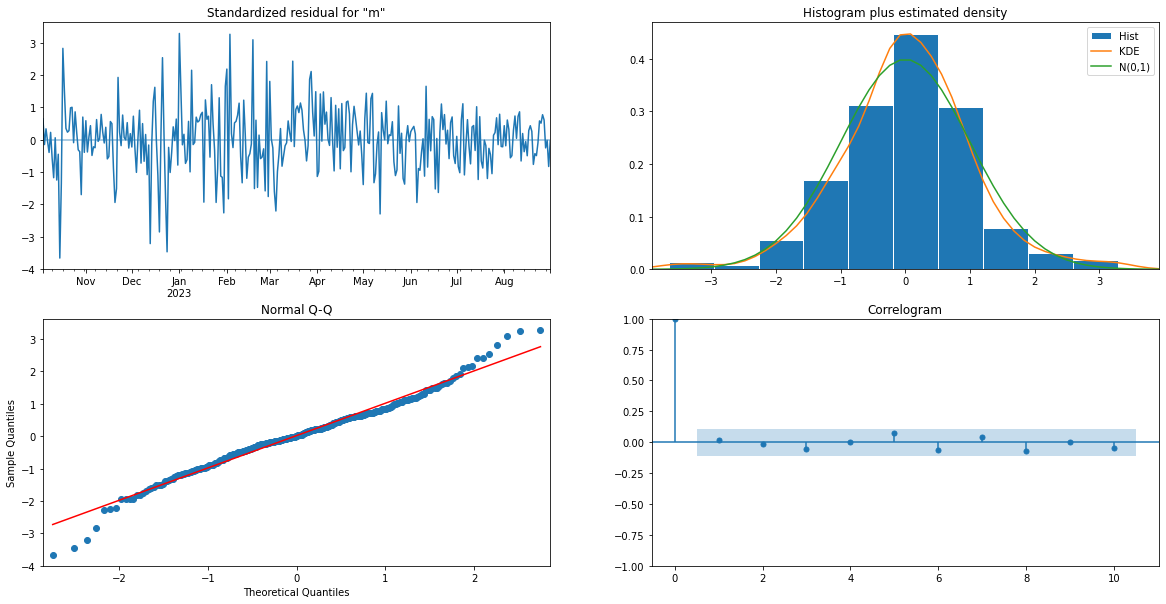

 
-----------------------------------------------------------
Step 4: Validating the Forecast
Overal, the forecasts align with the true values quite well


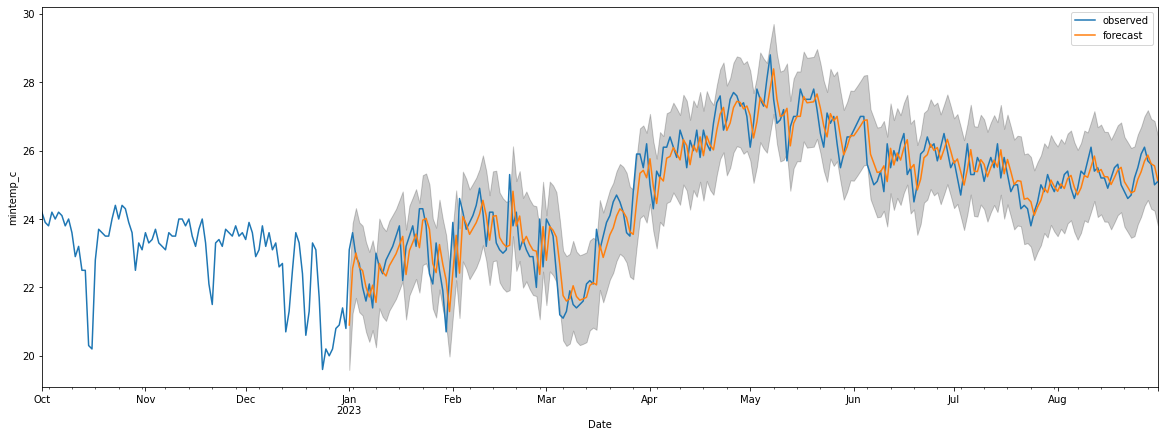

 
-----------------------------------------------------------
Step 5: Compute the Mean Squared Error of the forecasts
 The MSE of the forecasts is 0.42
 
-----------------------------------------------------------
Step 6: Forecast next 30 days
file csv of forecasted values is created


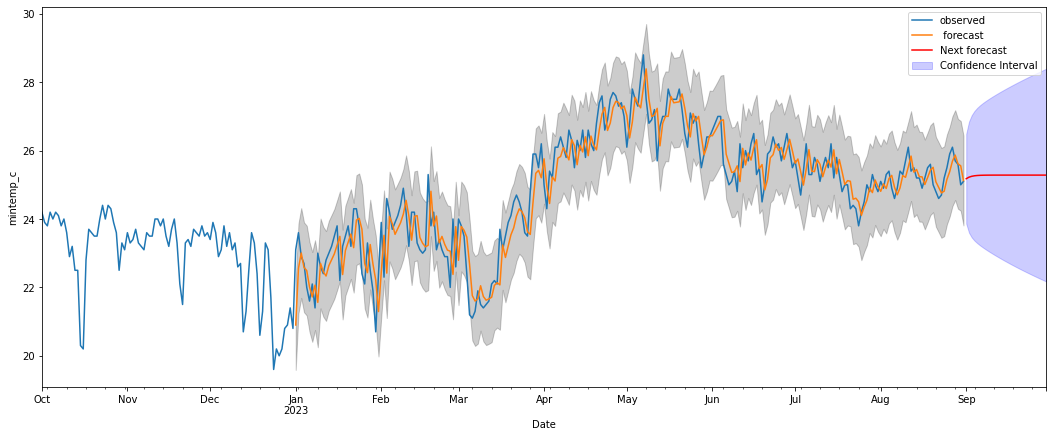

In [43]:
import statsmodels.api as sm
import itertools

import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages
from datetime import datetime

create_a_SARIMA_model(data)